# Local Covid-19 Metrics

## Gather Datasets

In [1]:

# init
import pandas as pd
import requests
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pandas import DataFrame

# set parameters
days_back = 365

# get content from web APIs
us = requests.get('https://api.covidtracking.com/v1/states/daily.json')
us = us.text
us = pd.read_json(us)

# make function for the covid tracking api since they are all the same
def clean_covidtracking_api_data(df):
    
    # get subset
    df = df[['date','state','positiveIncrease','totalTestResultsIncrease'
           ,'hospitalizedCurrently','death','deathIncrease','positive']]
    
    # Rename dataset columns
    df = df.rename(columns={'positiveIncrease':'positive'
                              ,'totalTestResultsIncrease': 'tests'
                              ,'hospitalizedCurrently': 'hospitalized'
                              ,'death': 'death_total'
                              ,'deathIncrease': 'death'
                              ,'positive': 'positive_total'})
    
    # Harmonize date column
    df['date'] = df['date'].astype(str)
    df['date'] = pd.to_datetime(pd.Series(df['date']), format="%Y%m%d")
    
    # Derived Columns
    # Positivity Rate
    positive = df.loc[:,['positive']].values[0:]
    tests = df.loc[:,['tests']].values[0:]
    df['pos_rate'] = positive / tests * 100

    # Death Rate
    deaths = df.loc[:,['death_total']].values[0:]
    positive = df.loc[:,['positive_total']].values[0:]
    df['death_rate'] = (deaths / positive) * 100
    df['death_rate_est'] = (deaths / (positive * 10)) * 100
    
    return df

# fix individual files
us = clean_covidtracking_api_data(us)



In [2]:
# us.head(5)

us.to_csv(r'daily_covid_us.csv')

us    

,date,state,positive,tests,hospitalized,death_total,death,positive_total,pos_rate,death_rate,death_rate_est
0,2020-10-16,AK,228,3203,59.0,66.0,1,11576.0,7.118327,0.570145,0.057015
1,2020-10-16,AL,1212,7108,859.0,2786.0,30,170374.0,17.051210,1.635226,0.163523
2,2020-10-16,AR,1015,11896,583.0,1665.0,20,97539.0,8.532280,1.707010,0.170701
3,2020-10-16,AS,0,0,NaN,0.0,0,0.0,NaN,NaN,NaN
4,2020-10-16,AZ,738,8347,747.0,5806.0,17,229486.0,8.841500,2.530002,0.253000
...,...,...,...,...,...,...,...,...,...,...,...
12704,2020-01-24,WA,0,0,NaN,NaN,0,0.0,NaN,NaN,NaN
12705,2020-01-23,MA,0,1,NaN,NaN,0,NaN,0.000000,NaN,NaN
12706,2020-01-23,WA,0,0,NaN,NaN,0,0.0,NaN,NaN,NaN
12707,2020-01-22,MA,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN


## Visualization

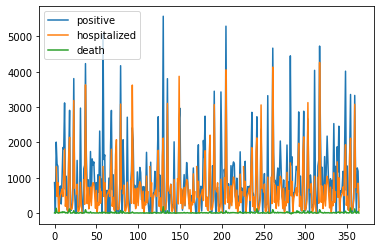

In [3]:
political_entity = us

subset_df = political_entity.loc[:,['positive']]
arr = subset_df[:].to_numpy()
reversed_arr = arr[::-1]
reversed_arr = reversed_arr[-days_back:]
plt.plot(reversed_arr[0:], label = 'positive')

subset_df = political_entity.loc[:,['hospitalized']]
arr = subset_df[:].to_numpy()
reversed_arr = arr[::-1]
reversed_arr = reversed_arr[-days_back:]
plt.plot(reversed_arr[0:], label = 'hospitalized')

subset_df = political_entity.loc[:,['death']]
arr = subset_df[:].to_numpy()
reversed_arr = arr[::-1]
reversed_arr = reversed_arr[-days_back:]
plt.plot(reversed_arr[0:], label = 'death')

plt.legend()
plt.show()


# References

- https://www-doh.state.nj.us/doh-shad/view/sharedstatic/CrudeDeathRate.pdf
- https://www.cnn.com/resources/coronavirus-information/19067
